# Project 7
## Author: Sarah Howard
## Github Repository:  https://github.com/sapapesh/datafun-07-ml

In [118]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

### Linear Relationships

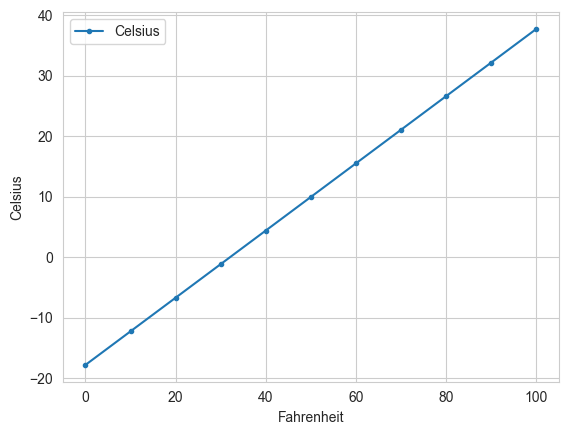

In [119]:
c = lambda f: 5 / 9* (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition
Follow the instructions to load NY City January high temperature from a csv file into a DataFrame.
Recommended: Rather than nyc, name the dataframe nyc_df to reinforce the DataFrame operations.
Recommended: Add all imports to the top of your file, just under the Markdown Introduction. Follow conventions. 

In [120]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection
Follow the instructions to view head and tail of the file. 

In [121]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [122]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning
Follow the instructions to clean the data. Improve the column names and clean up the date series. 

In [123]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [124]:
nyc_df.Date.dtype

dtype('int64')

In [125]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics
 Set the display precision to 2 decimal places. Use 'display.precision' instead of 'precision' as shown in the text.
Use describe() to calculate basic descriptive statistics for the dataset

In [126]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model
Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.
Recommended: Add all imports to the top of your file, just under the Markdown Introduction. Follow conventions. 

In [127]:
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)

In [128]:
linear_regression.slope

0.014771361132966163

In [129]:
linear_regression.intercept

8.694993233674289

### Section 6 - Predict
Use your model to predict the "average high temp in Jan" for the year 2024 (just like they did for 2019).

In [130]:
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

### Section 7 - Visualizations
Follow the instructions and use Seaborn to generate a scatter plot with a best fit line.
Set the axes and the y scale as directed
Customize your chart and notebook as you like to make your work clear and compelling. 

(10.0, 70.0)

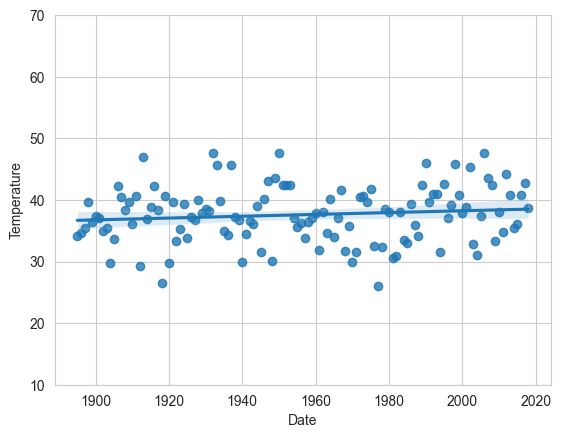

In [131]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)